In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
import os
print(os.path.exists(r"C:\Users\91897\OneDrive\Desktop\RAVIKIRAN\Sales_Data_Analysis\data\superstore.csv"))

False


In [25]:
import os

folder = r"C:\Users\91897\OneDrive\Desktop\RAVIKIRAN\Sales_Data_Analysis\data"
print(os.listdir(folder))


['superstore.csv.csv']


In [29]:
df = pd.read_csv(r"C:\Users\91897\OneDrive\Desktop\RAVIKIRAN\Sales_Data_Analysis\data\superstore.csv.csv", encoding="cp1252")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [31]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [33]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [36]:
df["Total_Sales"] = df["Sales"]

In [37]:
df["UnitPrice"] = df["Sales"] / df["Quantity"]

In [38]:
df["Total_Sales"] = df["Quantity"] * df["UnitPrice"]

In [39]:
total_sales = df["Total_Sales"].sum()
print("Total Sales:", total_sales)


Total Sales: 2297200.8603000003


In [43]:
top_products = df.groupby("Product ID")["Total_Sales"].sum()
top_products


Product ID
FUR-BO-10000112     825.174
FUR-BO-10000330    1064.624
FUR-BO-10000362    2154.348
FUR-BO-10000468     723.842
FUR-BO-10000711     851.760
                     ...   
TEC-PH-10004912     516.530
TEC-PH-10004922    1085.238
TEC-PH-10004924      56.164
TEC-PH-10004959     341.666
TEC-PH-10004977    5291.730
Name: Total_Sales, Length: 1862, dtype: float64

In [48]:
region_sales = df.groupby("Region")["Total_Sales"].sum()
region_sales

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Total_Sales, dtype: float64

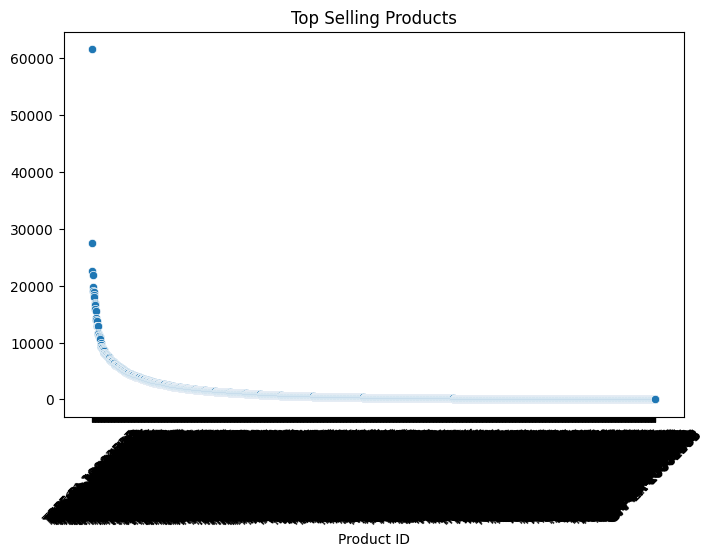

In [52]:
#VISUALIZATION PROCESS
plt.figure(figsize=(8,5))
sns.scatterplot(x=top_products.index, y=top_products.values)
plt.title("Top Selling Products")
plt.xticks(rotation=45)
plt.show()


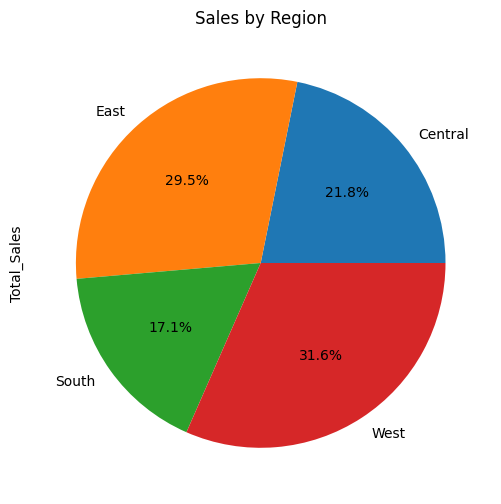

In [50]:
plt.figure(figsize=(6,6))
region_sales.plot(kind="pie", autopct="%1.1f%%")
plt.title("Sales by Region")
plt.show()


In [58]:
#MONTHLY SALES TREND
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df.groupby('Month')['Sales'].sum()


Month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64

<Axes: xlabel='Sales', ylabel='Profit'>

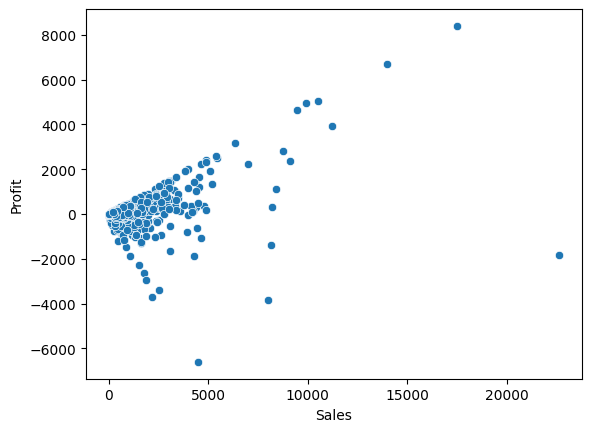

In [59]:
#Profit vs Sales Comparison
sns.scatterplot(x='Sales', y='Profit', data=df)



In [60]:
#Category-wise Profit
df.groupby('Category')['Profit'].sum()


Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64